In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

class SimplePendulumEnv:
    def __init__(self):
        self.g = 9.8  # acceleration due to gravity in m/s^2
        self.l = 1.0  # length of the pendulum in meters
        self.m = 1.0  # mass of the pendulum bob in kg
        self.dt = 0.05  # time step in seconds
        self.theta = 0.0  # pendulum angle from the vertical (in radians)
        self.theta_dot = 0.0  # pendulum angular velocity
        
        # Action space bounds
        self.max_torque = 2.0
        
        # Observation space bounds
        self.max_speed = 8  # Arbitrary bound on angular velocity
        
        # For rendering
        self.fig, self.ax = plt.subplots(figsize=(5, 5))

    def step(self, action):
        action = np.clip(action, -self.max_torque, self.max_torque)[0]
        theta_ddot = (-self.g / self.l) * np.sin(self.theta) + (1 / (self.m * self.l ** 2)) * action
        self.theta_dot = np.clip(self.theta_dot + theta_ddot * self.dt, -self.max_speed, self.max_speed)
        self.theta += self.theta_dot * self.dt
        self.theta = self._normalize_angle(self.theta)
        
        # Calculate reward (for simplicity: penalize the deviation from the upright position)
        reward = -((self.theta ** 2) + (0.1 * self.theta_dot ** 2) + (0.001 * (action ** 2)))
        
        # Observation is the new state
        observation = np.array([self.theta, self.theta_dot])
        return observation, reward, False, {}

    def reset(self):
        self.theta = np.random.uniform(-np.pi, np.pi)
        self.theta_dot = np.random.uniform(-1, 1)
        return np.array([self.theta, self.theta_dot])
    
    def render(self):
        if self.fig is None:
            # plt.ion()
            self.fig, self.ax = plt.subplots(figsize=(5, 5))
        
        self.ax.clear()
        x = np.sin(self.theta) * self.l
        y = -np.cos(self.theta) * self.l
        self.ax.plot([0, x], [0, y], marker='o')
        self.ax.set_xlim(-self.l, self.l)
        self.ax.set_ylim(-self.l, self.l)
        self.ax.set_aspect('equal', 'box')
        plt.draw()
        plt.pause(0.01)
    
    def _normalize_angle(self, theta):
        """Normalize the angle to be within [-pi, pi]"""
        return ((theta + np.pi) % (2 * np.pi)) - np.pi

# Example of using the environment
env = SimplePendulumEnv()
obs = env.reset()
done = False

while not done:
    action = np.array([0.1])  # Example action: small constant torque
    obs, reward, done, info = env.step(action)
    env.render()

plt.ioff()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

class SimplePendulumEnv:
    def __init__(self):
        self.g = 9.8  # acceleration due to gravity in m/s^2
        self.l = 1.0  # length of the pendulum in meters
        self.m = 1.0  # mass of the pendulum bob in kg
        self.dt = 0.05  # time step in seconds
        self.theta = 0.0  # pendulum angle from the vertical (in radians)
        self.theta_dot = 0.0  # pendulum angular velocity
        
        # Action space bounds
        self.max_torque = 2.0
        
        # Observation space bounds
        self.max_speed = 8  # Arbitrary bound on angular velocity

        # # For rendering
        # self.fig, self.ax = plt.subplots(figsize=(5, 5))
        # self.line, = self.ax.plot([], [], marker='o')  # Initialize a blank line
        # self.ax.set_xlim(-self.l, self.l)
        # self.ax.set_ylim(-self.l, self.l)
        # self.ax.set_aspect('equal', 'box')

    def step(self, action):
        action = np.clip(action, -self.max_torque, self.max_torque)[0]
        theta_ddot = (-self.g / self.l) * np.sin(self.theta) + (1 / (self.m * self.l ** 2)) * action
        self.theta_dot = np.clip(self.theta_dot + theta_ddot * self.dt, -self.max_speed, self.max_speed)
        self.theta += self.theta_dot * self.dt
        self.theta = self._normalize_angle(self.theta)
        
        # Calculate reward
        reward = -((self.theta ** 2) + (0.1 * self.theta_dot ** 2) + (0.001 * (action ** 2)))
        
        # Observation is the new state
        observation = np.array([self.theta, self.theta_dot])
        return observation, reward, False, {}

    def reset(self):
        self.theta = np.random.uniform(-np.pi, np.pi)
        self.theta_dot = np.random.uniform(-1, 1)
        return np.array([self.theta, self.theta_dot])
    
    def render(self, ax=None) -> None:

        plt.cla()

        if ax is None:
            fig, ax = plt.subplots()
        plt.axis('equal')

        x = np.sin(self.theta) * self.l
        y = -np.cos(self.theta) * self.l
        plt.scatter([0, x], [0, y])

        display.display(plt.gcf())
        display.clear_output(wait=True)
    
    def _normalize_angle(self, theta):
        """Normalize the angle to be within [-pi, pi]"""
        return ((theta + np.pi) % (2 * np.pi)) - np.pi

env = SimplePendulumEnv()
obs = env.reset()
done = False
fig, ax = plt.subplots()

while not done:
    action = np.array([0.1])  # Example action: small constant torque
    obs, reward, done, info = env.step(action)
    env.render(ax)

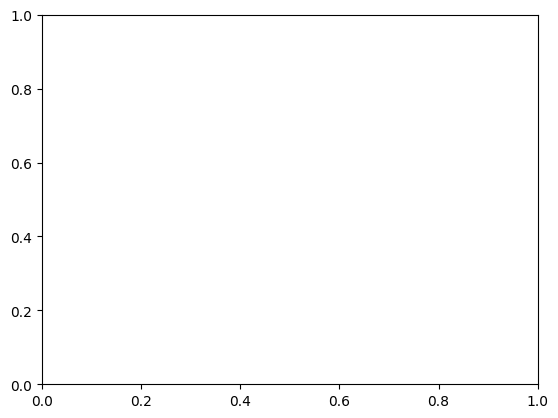

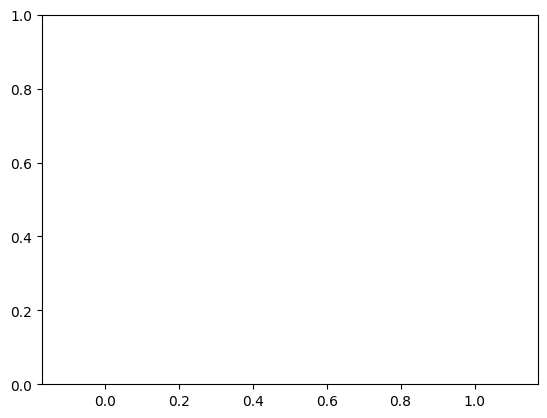

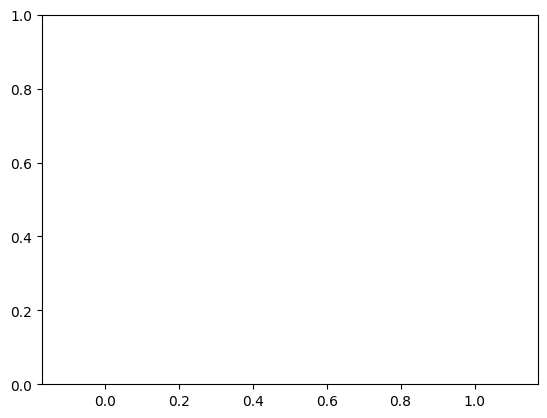

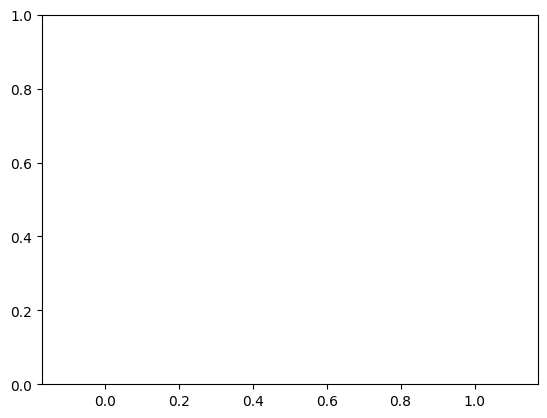

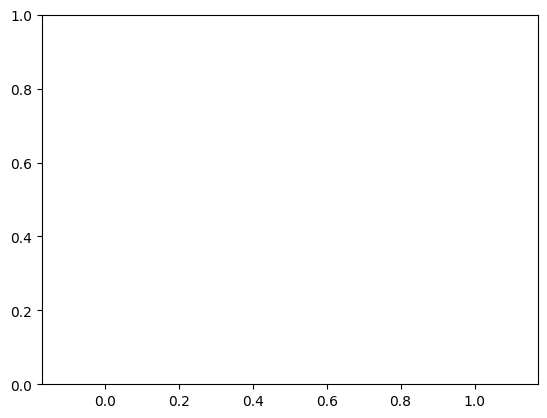

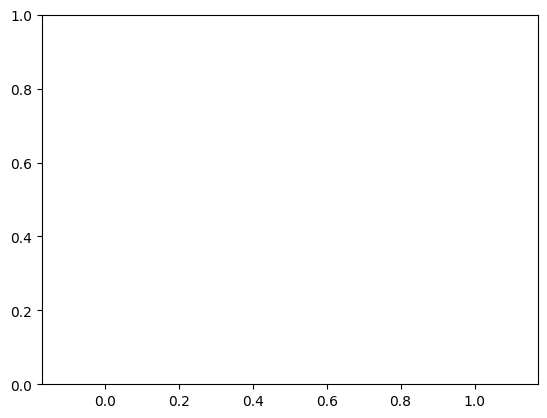

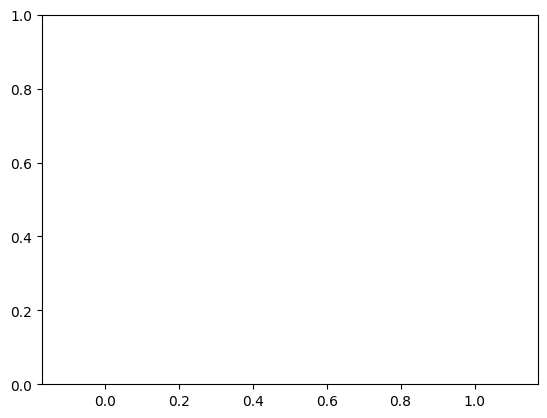

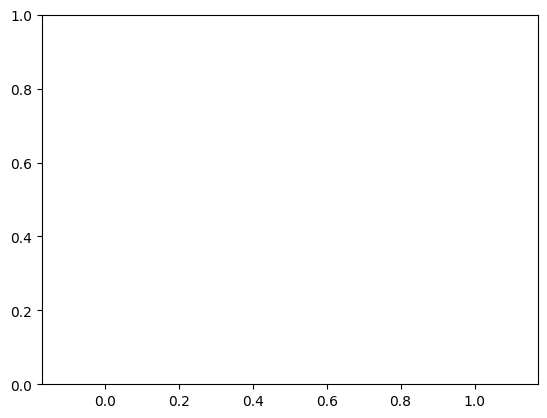

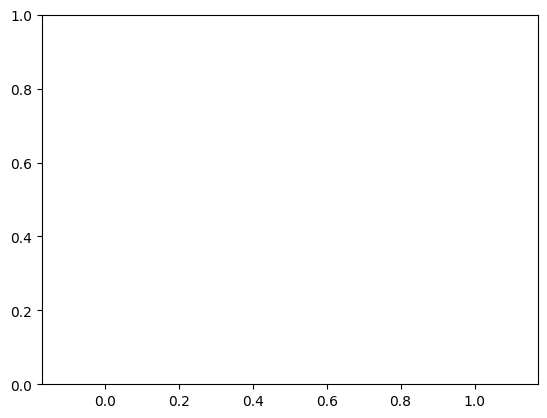

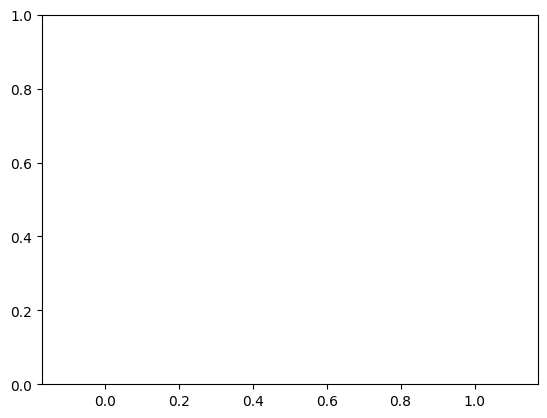

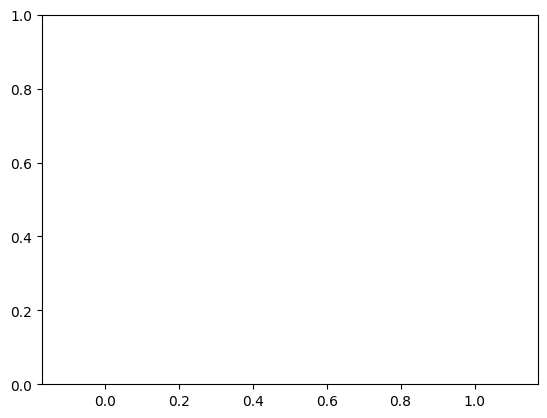

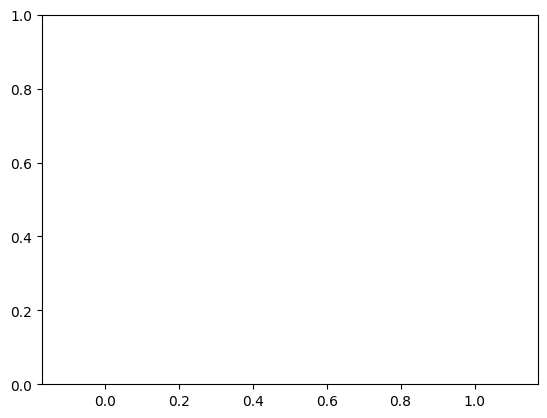

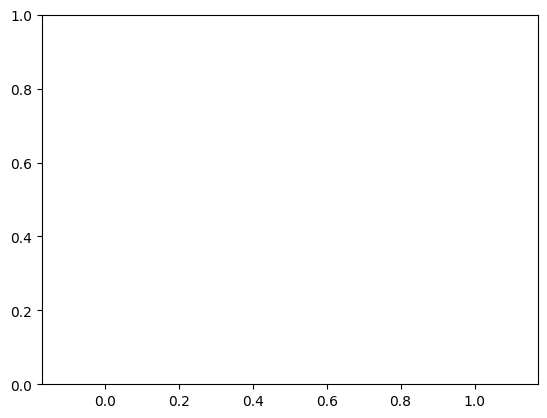

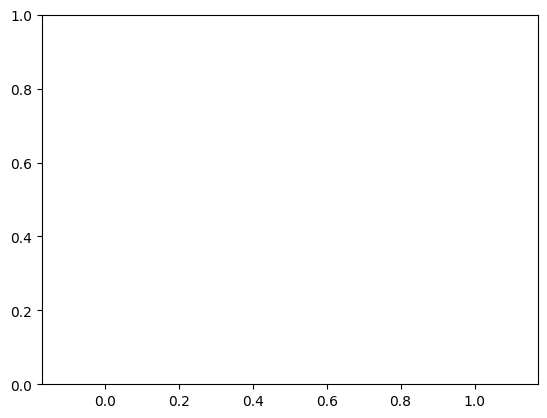

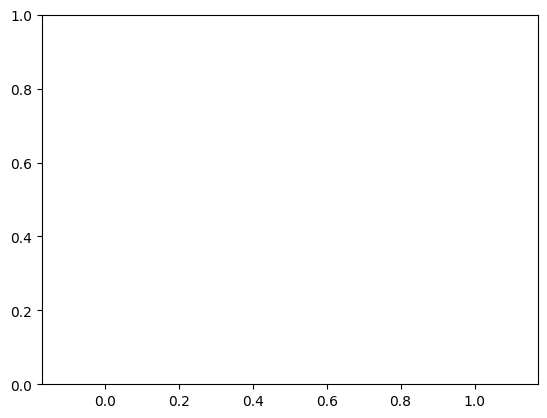

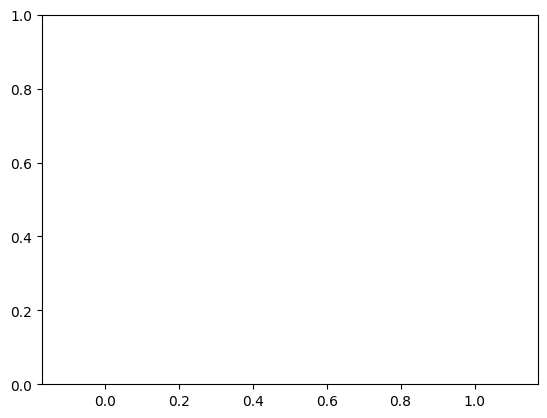

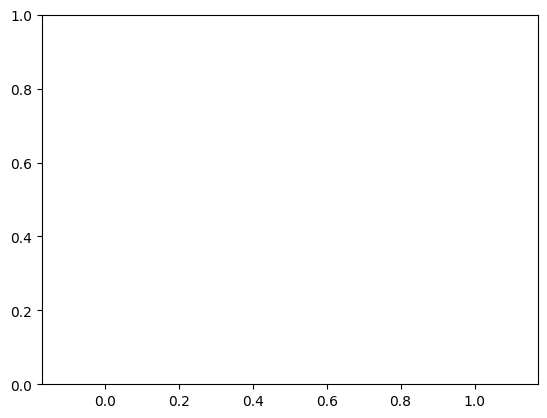

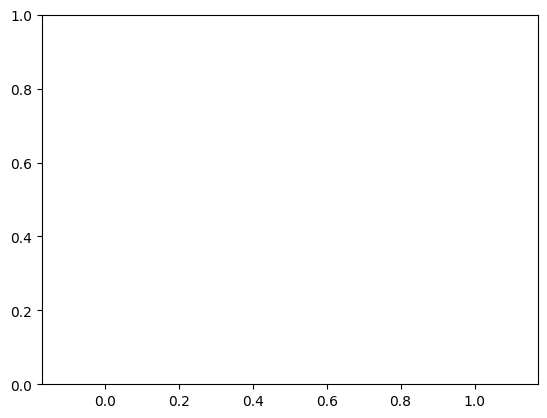

Error in callback <function flush_figures at 0x7f002f9225e0> (for post_execute):


KeyboardInterrupt: 

In [4]:
import math
import numpy as np
from IPython import display
import matplotlib.pyplot as plt

class CartPoleEnv:
    def __init__(self):
        # Constants
        self.gravity = 9.8
        self.mass_cart = 2.0
        self.mass_pole = 1.0
        self.total_mass = self.mass_cart + self.mass_pole
        self.length = 1  # Half the pole's length
        self.polemass_length = self.mass_pole * self.length
        self.force_mag = 10.0
        self.dt = 0.02  # Time step

        # Angle at which to fail the episode
        self.theta_threshold_radians = 12 * 2 * math.pi / 360
        self.x_threshold = 20

        # State: [cart position, cart velocity, pole angle from the downward vertical, pole angular velocity]
        self.state = None

    def step(self, action):
        err_msg = f"{action} invalid. Action must be either 0 (left) or 1 (right)."
        assert action in [0, 1], err_msg

        x, x_dot, theta, theta_dot = self.state
        force = self.force_mag if action == 1 else -self.force_mag
        costheta = math.cos(theta)
        sintheta = math.sin(theta)

        # For the sake of simplicity, we'll ignore some dynamics
        temp = (force + self.polemass_length * theta_dot**2 * sintheta) / self.total_mass
        thetaacc = (self.gravity * sintheta - costheta * temp) / (self.length * (4.0/3.0 - self.mass_pole * costheta**2 / self.total_mass))
        xacc = temp - self.polemass_length * thetaacc * costheta / self.total_mass

        # Update the state
        x += self.dt * x_dot
        x_dot += self.dt * xacc
        theta += self.dt * theta_dot
        theta_dot += self.dt * thetaacc
        self.state = (x, x_dot, theta, theta_dot)

        done = x < -self.x_threshold \
               or x > self.x_threshold \
               or theta < -self.theta_threshold_radians \
               or theta > self.theta_threshold_radians

        reward = 0 if done else 1

        return np.array(self.state), reward, done, {}

    def reset(self):
        self.state = np.zeros(4)
        return self.state
    
    def render(self, ax=None) -> None:

        plt.cla()

        if ax is None:
            fig, ax = plt.subplots()
        plt.axis('equal')

        x, _, theta, _ = self.state

        # Draw cart
        cart_width = 0.3
        cart_height = 0.2
        pole_width = 0.05
        pole_len = 1.0 * self.length  # Displayed pole length

        cart_x = x - cart_width / 2
        cart_y = 0 - cart_height / 2
        pole_x = x
        pole_y = 0
        pole_theta = theta - np.pi / 2  # Convert to right triangle

        ax.add_patch(plt.Rectangle((cart_x, cart_y), cart_width, cart_height, color='blue'))
        ax.plot([pole_x, pole_x + np.cos(pole_theta) * pole_len], [pole_y, pole_y + np.sin(pole_theta) * pole_len], linewidth=4, color='red')

        ax.set_xlim(-self.x_threshold * 1.2, self.x_threshold * 1.2)
        ax.set_ylim(-self.length * 1.2, self.length * 1.2)
        ax.set_aspect('equal')

# Example usage
env = CartPoleEnv()
obs = env.reset()
done = False
while not done:
#     action = np.random.choice([0, 1])  # Random action
    env.render()
    action = 1 if (180 - obs[2] - 10 * obs[3]) > 0 else 0
    obs, reward, done, info = env.step(action)

    display.display(plt.gcf())
    display.clear_output(wait=True)